In [1]:
#descargar datos de mnist y dividirlos en conjuntos de prueba y de tren
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

2021-12-07 14:35:15.062693: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/oracle/instantclient_19_8
2021-12-07 14:35:15.062739: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


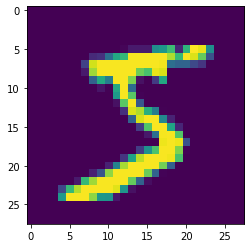

In [2]:
#traza la primera imagen del conjunto de datos
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [3]:
#comprobar la forma de la imagen
X_train[0].shape

(28, 28)

## Preprocesamiento de datos

A continuación, necesitamos remodelar las entradas de nuestro conjunto de datos (X_train y X_test) de la forma en que nuestro modelo espera cuando entrenamos el modelo. El primer número es el número de imágenes (60.000 para X_train y 10.000 para X_test). Luego viene la forma de cada imagen (28x28). El último número es 1, lo que significa que las imágenes están en escala de grises.

In [4]:
#reformar los datos para que se ajusten al modelo
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

Necesitamos **'hot code'** nuestra variable de destino. Esto significa que se creará una columna para cada categoría de salida y se ingresará una variable binaria para cada categoría. Por ejemplo, vimos que la primera imagen en el conjunto de datos es un 5. Esto significa que el sexto número en nuestra matriz tendrá un 1 y el resto de la matriz se rellenará con 0.

In [5]:
from tensorflow.keras.utils import to_categorical

#one-hot encode target column
y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [6]:
#CREANDO EL MODELO#

#from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
#from tensorflow.keras.models import Sequential

#model = Sequential()#add model layers
#model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
#model.add(MaxPooling2D(pool_size = (5, 5),strides = (2, 2), padding = "same"))
#model.add(Conv2D(32, kernel_size=3, activation="relu"))
#model.add(Flatten())
#model.add(Dense(10, activation="softmax"))

# o tambien

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    # Conv2D hidden layer (This is a convolution layer)
    #Data entry is a tuple because the two-dimensional image (28 pixels high, 28 wide and 1 represents that the image is in the gray scale)
    layers.Conv2D(64, kernel_size = 3, activation = "relu", input_shape = (28,28,1)),
    
    # Capa "MaxPooling2D"
    #Reducir la muestra de la entrada a lo largo de sus dimensiones espaciales (alto y ancho) tomando el valor máximo sobre una ventana de entrada (de tamaño definido por pool_size) para cada canal de la entrada.
    #La ventana se mueve a pasos agigantados a lo largo de cada dimensión.
    #La forma de salida resultante cuando se usa el "mismo" La opción de relleno es: output_shape = math.floor ((input_shape - 1) / strides) + 1
    layers.MaxPooling2D(pool_size = (5, 5),strides = (2, 2), padding = "same"),

    # o tambien 
    
    #La salida resultante, cuando se usa la opción de relleno "válida", tiene una forma espacial (número de filas o columnas) de: output_shape = math.floor ((input_shape - pool_size) / strides) + 1 (cuando input_shape> = pool_size)
    #layers.MaxPooling2D(pool_size = (5, 5),strides = (2, 2), padding = "valid"),
    
    
    
    #la capa oculta de Conv2D (esta es una capa de convolución)
    layers.Conv2D(32, kernel_size = 3, activation = "relu"),
    
    #"Flatten"sirve como conexión entre la convolución y las capas densas.
    layers.Flatten(),
    
    
    #Tendremos 10 nodos en nuestra capa de salida, uno para cada resultado posible (0–9).
    # La activación "Softmax" convierte un vector de valores en una distribución de probabilidad. El argumento del eje establece qué eje de la entrada a lo largo del cual se aplica la función
    #Softmax se usa a menudo como un disparador para la última capa de una red de clasificación porque el resultado podría interpretarse como una distribución de probabilidad.
    layers.Dense(units = 10, activation = "softmax"),
])

2021-12-07 14:35:17.751509: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/oracle/instantclient_19_8
2021-12-07 14:35:17.751556: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-07 14:35:17.751579: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (virtual-machine): /proc/driver/nvidia/version does not exist
2021-12-07 14:35:17.751961: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
#compilar el modelo utilizando precisión para medir el rendimiento del modelo
model.compile(optimizer = "adam",
              loss = "categorical_crossentropy", 
              metrics = ["accuracy"])

In [8]:
#entrenamiento del modelo
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3235 - accuracy: 0.9377 - val_loss: 0.0993 - val_accuracy: 0.9697
Epoch 2/3
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1058 - accuracy: 0.9690 - val_loss: 0.1057 - val_accuracy: 0.9717
Epoch 3/3
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0889 - accuracy: 0.9742 - val_loss: 0.1006 - val_accuracy: 0.9752


## Usando nuestro modelo para hacer predicciones

Si desea ver las predicciones reales que nuestro modelo ha hecho para los datos de prueba, podemos usar la función de predicción. La función de predicción dará una matriz con 10 números. Estos números son las probabilidades de que la imagen de entrada represente cada dígito (0–9). El índice de la matriz con el número más alto representa la predicción del modelo. La suma de cada matriz es igual a 1 (ya que cada número es una probabilidad).

Para mostrar esto, mostraremos las predicciones para las primeras 4 imágenes en el conjunto de prueba.

**Nota: Si tenemos nuevos datos, podemos ingresar nuestros nuevos datos en la función de predicción para ver las predicciones que hace nuestro modelo sobre los nuevos datos. Dado que no tenemos ningún dato nuevo que no se haya visto, mostraremos predicciones usando el conjunto de prueba por ahora.**

In [9]:
# predice las primeras 4 imágenes en el conjunto de prueba
model.predict(X_test[:4])

array([[5.56177120e-13, 5.38809622e-16, 1.72071035e-09, 6.13306517e-10,
        9.63841769e-18, 1.03356728e-15, 2.01234633e-25, 1.00000000e+00,
        3.16681292e-14, 7.27770188e-12],
       [2.14798719e-13, 1.40647494e-09, 1.00000000e+00, 5.29159746e-12,
        1.47320817e-17, 2.98247448e-17, 9.38659636e-11, 5.81446164e-17,
        1.59513537e-12, 9.03067971e-20],
       [6.41239503e-13, 9.99997497e-01, 2.33573894e-09, 2.02811231e-14,
        1.94193899e-06, 2.15471239e-12, 5.76280627e-07, 1.61730726e-10,
        2.45065235e-11, 5.45420425e-13],
       [9.99994516e-01, 3.37960698e-13, 6.52190195e-08, 4.12401368e-14,
        8.27522252e-12, 1.15178235e-10, 5.26171380e-06, 2.33809066e-12,
        5.99882171e-08, 4.57966748e-10]], dtype=float32)

In [10]:
#Resultados reales de las primeras 4 imágenes en el conjunto de prueba
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Minimum Validation Loss: 0.0993


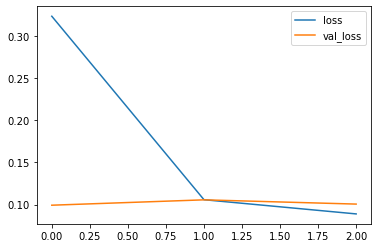

In [14]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

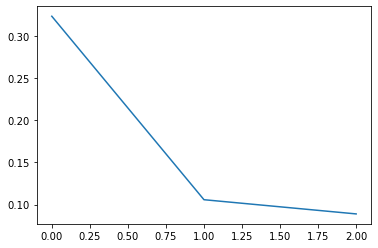

In [12]:
# convertir el historial de entrenamiento en un marco de datos
history_df = pd.DataFrame(history.history)
# use el método de trazado nativo de Pandas
history_df['loss'].plot();

# Thanks to :
# Gracias a :
https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5